In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

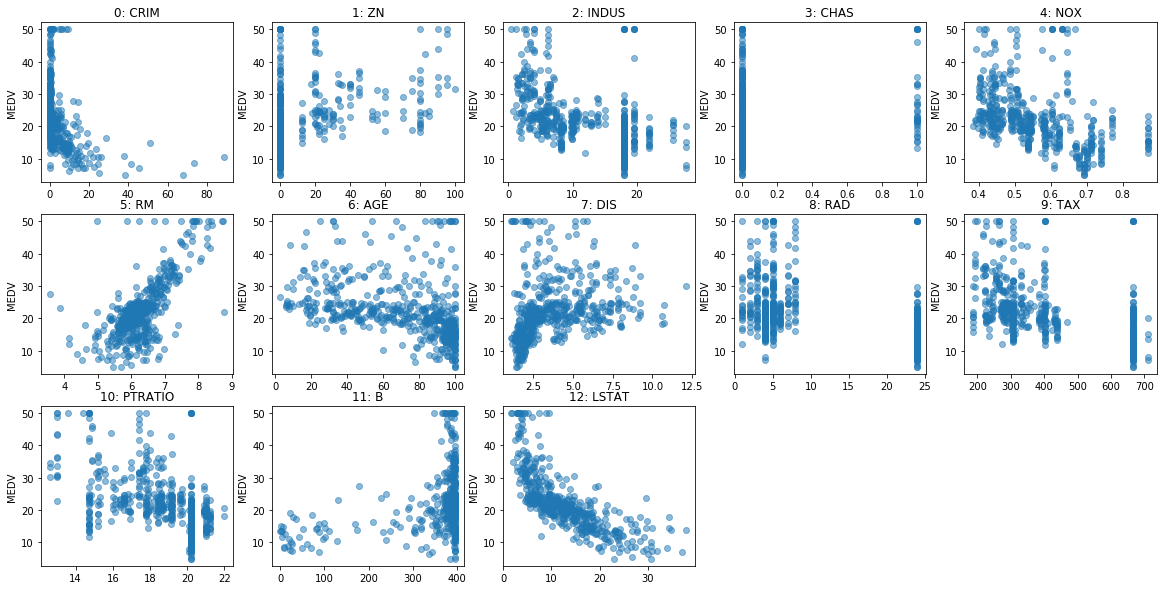

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")
plt.savefig("images/boston_scatter.png")

Text(0, 0.5, 'MEDV')

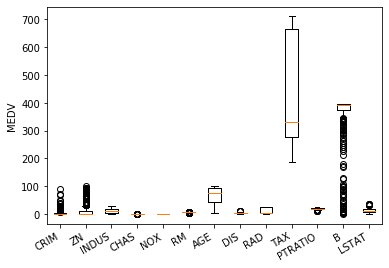

In [6]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

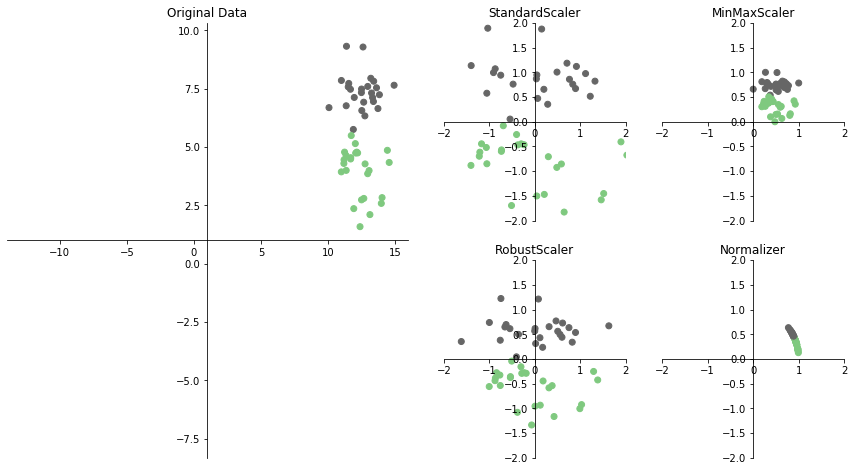

In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7171539419481713, 0.12542507526669922)

In [10]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.717857740992487, 0.12714518912895748)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49901769734878754, 0.1459168750863542)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7502341979953768, 0.10562600471156965)

In [13]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):
    # multiclass                                                                  
    if eps is None:                                                               
        eps = X.std(axis=0) / 2.
    else:\
        eps = np.array([eps, eps])

    if ax is None:                                                                
        ax = plt.gca()                                                            

    x_min, x_max = X[:, 0].min() - eps[0], X[:, 0].max() + eps[0]
    y_min, y_max = X[:, 1].min() - eps[1], X[:, 1].max() + eps[1]

    xx = np.linspace(x_min, x_max, 1000)                                          
    yy = np.linspace(y_min, y_max, 1000)                                          

    X1, X2 = np.meshgrid(xx, yy)                                                  
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                        
    decision_values = classifier.predict(X_grid)                                  
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,            
                                                       y_min, y_max),             
            aspect='auto', origin='lower', alpha=alpha, cmap=plt.cm.bwr)          

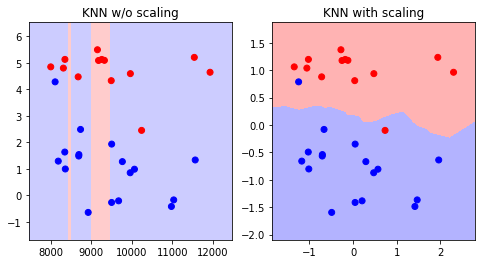

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

X, y = make_blobs(centers=2, random_state=4, n_samples=30)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))


X = X * np.array([1000, 1])

# a carefully hand-designed dataset lol
y[7] = 0
y[27] = 0

knn = KNeighborsClassifier().fit(X, y)

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
axes[0].set_title("KNN w/o scaling")
# only adjust plot, don't actually plot alpha=0
plot_2d_classification(knn, X, ax=axes[0], alpha=0)


X_scaled = scale(X)
knn_scaled = KNeighborsClassifier().fit(X_scaled, y)

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr')
axes[1].set_title("KNN with scaling")
# only adjust plot, don't actually plot alpha=0
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=0)

plt.savefig("images/knn_scaling.png")

plot_2d_classification(knn, X, ax=axes[0], alpha=.2)
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=.3)
plt.savefig("images/knn_scaling2.png")


# Pipelines

In [15]:
from sklearn.linear_model import Ridge
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.6345884564889055

In [16]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6345884564889055

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7455608822349746, 0.10625173604969355)

In [18]:
print(knn_pipe.steps)

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'))]


In [19]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor)))

In [20]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.5999825126971097


/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Feature Distributions

Text(0, 0.5, 'MEDV')

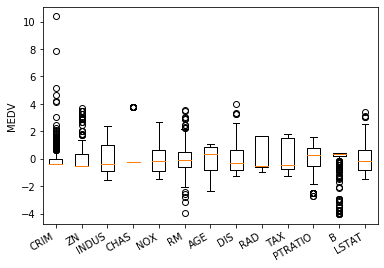

In [21]:
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

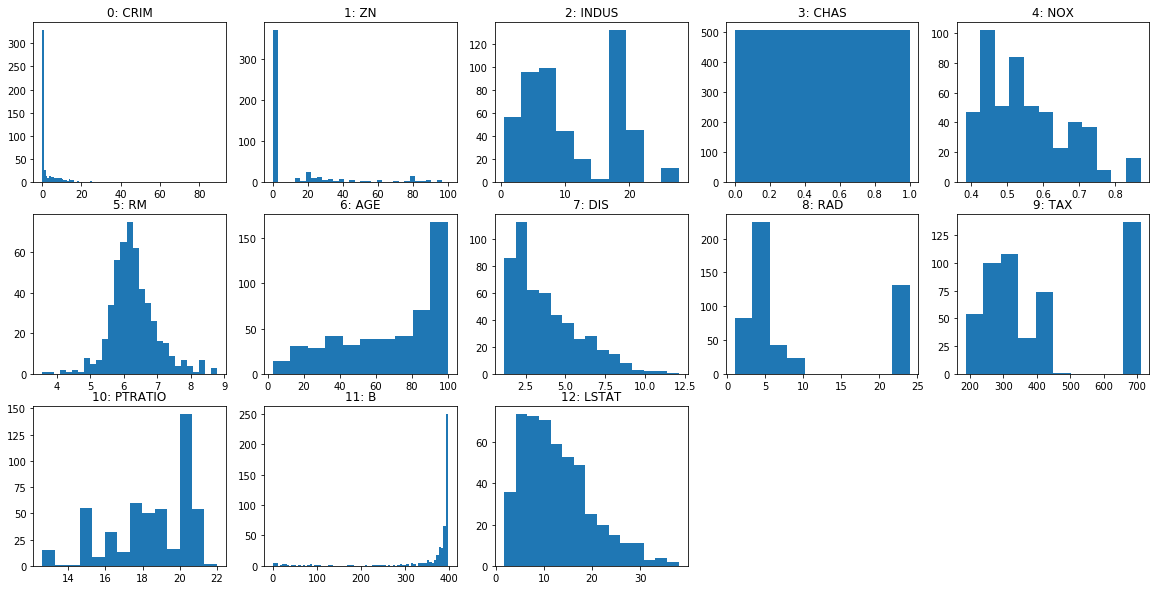

In [22]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.hist(X[:, i], bins="auto")
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
plt.savefig("images/boston_hist.png")

In [23]:
def bc(x, l):
    if l == 0:
        return np.log(x)
    else:
        return (x ** l - 1) / l


In [24]:
line = np.arange(1e-10, 10, 100)

In [25]:
line

array([1.e-10])

(0, 10)

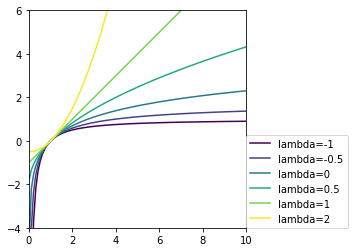

In [26]:
line = np.linspace(.01, 10, 100)
colors =  [plt.cm.viridis(i) for i in np.linspace(0, 1, 6)]
for l, c in zip([-1, -.5, 0, .5, 1, 2], colors):
    plt.plot(line, bc(line, l), label="lambda={}".format(l), color=c)
plt.ylim(-4, 6)
plt.gca().set_aspect("equal")
plt.legend(loc=(1, 0))
plt.xlim(0, 10)

In [27]:
from sklearn.preprocessing import MinMaxScaler
# this is very hacky and you probably shouldn't do this in real life.
X_train_mm = MinMaxScaler().fit_transform(X_train) + 1e-5

[-22.83781945  -8.42863648  -0.65274636 -21.87132843  -1.10590415
   0.27608455   3.05504705  -2.8228078   -3.46557494  -1.75663877
   3.83256611  14.3325249   -1.75533113]


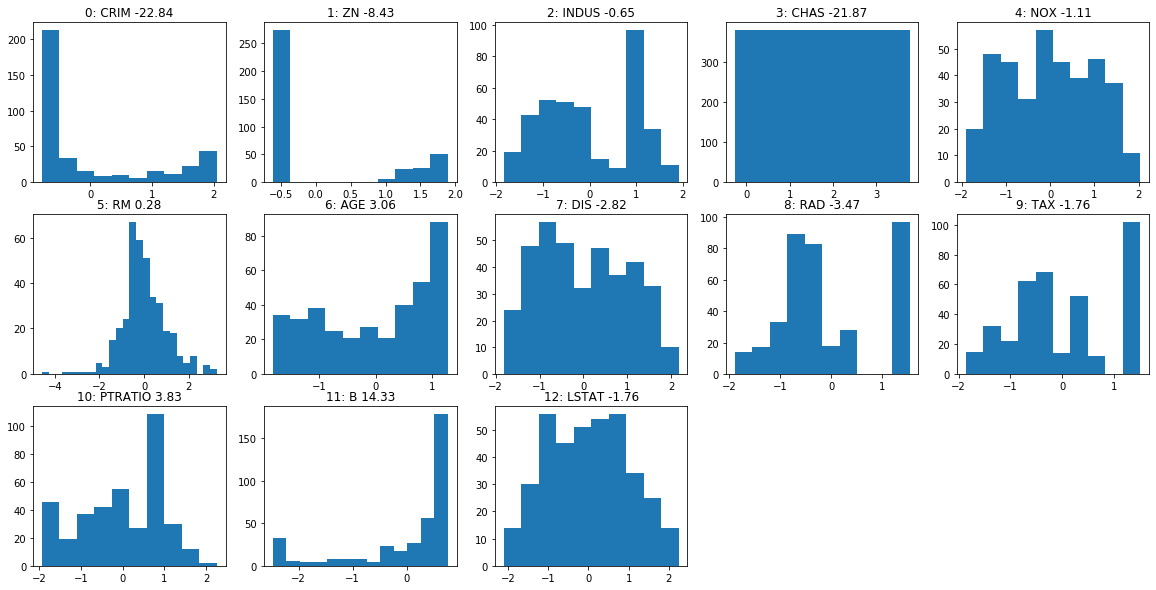

In [28]:
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
pt = PowerTransformer()
X_bc = pt.fit_transform(X_train_mm)
print(pt.lambdas_)

for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.hist(X_bc[:, i], bins="auto")
    ax.set_title("{}: {} {:.2f}".format(i, boston.feature_names[i], pt.lambdas_[i]))
plt.savefig("images/boston_hist_boxcox.png")

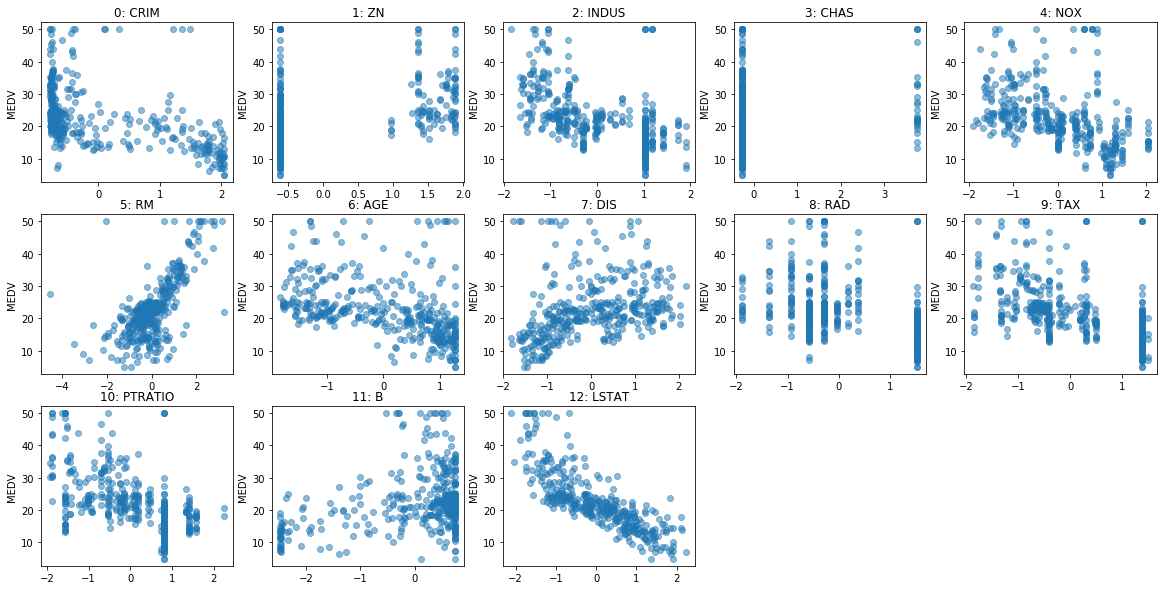

In [29]:
X_bc_scaled = StandardScaler().fit_transform(X_bc)
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_bc_scaled[:, i], y_train, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")
plt.savefig("images/boston_bc_scaled_scatter.png")

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7171539419481713, 0.12542507526669922)

In [31]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
print(np.mean(scores), np.std(scores))


0.717857740992487 0.12714518912895748


In [32]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7331923221802794, 0.09937662806858472)

In [33]:
ridge = RidgeCV().fit(X_train_scaled, y_train)
ridge_bc = RidgeCV().fit(X_bc_scaled, y_train)

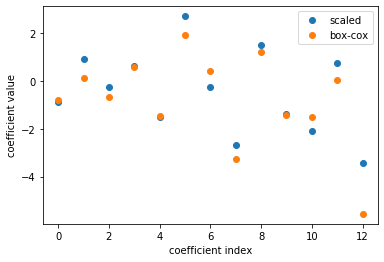

In [34]:
plt.plot(ridge.coef_, 'o', label="scaled")
plt.plot(ridge_bc.coef_, 'o', label="box-cox")
plt.xlabel("coefficient index")
plt.ylabel("coefficient value")
plt.legend()

In [35]:
# Categorical Variables

In [36]:
import re
def df2html(df):
    shorter = df.to_html().replace("th>\n", "th>")
    shorter = shorter.replace("<tr>\n", "<tr>")

    shorter = shorter.replace("td>\n", "td>")
    shorter = re.sub(">[ \t]+<", "><", shorter)
    print(shorter)

In [37]:
import pandas as pd
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,vegan
0,Manhattan,No
1,Queens,No
2,Manhattan,No
3,Brooklyn,Yes
4,Brooklyn,Yes
5,Bronx,No


In [38]:
df2html(df)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>No</td></tr>
  </tbody>
</table>


In [39]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'vegan']]
df

,boro,boro_ordinal,vegan
0,Manhattan,2,No
1,Queens,3,No
2,Manhattan,2,No
3,Brooklyn,1,Yes
4,Brooklyn,1,Yes
5,Bronx,0,No


In [40]:
df2html(df)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>boro_ordinal</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>2</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>3</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>2</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>1</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>1</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>0</td><td>No</td></tr>
  </tbody>
</table>


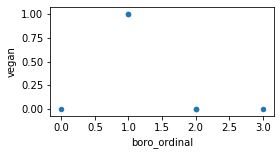

In [41]:
df_int = df.copy()
df_int['vegan'] = df.vegan.astype("category").cat.codes
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
plt.savefig("images/boro_ordinal.png")

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(df[['boro_ordinal']], df.vegan)
lr.coef_

/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-0.46703067]])

In [43]:
lr.intercept_

array([-0.0142189])

In [44]:
dec = lr.decision_function(np.linspace(0, 3).reshape(-1, 1))

In [45]:
lr.predict(np.linspace(0, 3).reshape(-1, 1))

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

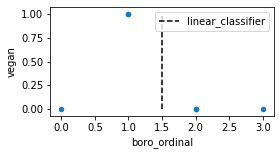

In [46]:
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
plt.vlines([1.5], 0, 1, linestyle='--', label='linear_classifier')
plt.legend(loc='best')
plt.savefig("images/boro_ordinal_classification.png")

In [47]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,vegan
0,Manhattan,No
1,Queens,No
2,Manhattan,No
3,Brooklyn,Yes
4,Brooklyn,Yes
5,Bronx,No


In [48]:
df2html(df)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>No</td></tr>
  </tbody>
</table>


In [49]:
df2html(pd.get_dummies(df))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th><th>vegan_No</th><th>vegan_Yes</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>0</td></tr>
    <tr><th>2</th><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>4</th><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>5</th><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
  </tbody>
</table>


In [50]:
import re
def df2html(df):
    shorter = df.to_html().replace("th>\n", "th>")
    shorter = shorter.replace("<tr>\n", "<tr>")

    shorter = shorter.replace("td>\n", "td>")
    shorter = re.sub(">[ \t]+<", "><", shorter)
    print(shorter)

In [51]:
df2html(pd.get_dummies(df))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th><th>vegan_No</th><th>vegan_Yes</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>0</td></tr>
    <tr><th>2</th><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>4</th><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>5</th><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
  </tbody>
</table>


In [52]:
pd.get_dummies(df, columns=['boro'])

,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,No,0,0,1,0
1,No,0,0,0,1
2,No,0,0,1,0
3,Yes,0,1,0,0
4,Yes,0,1,0,0
5,No,1,0,0,0


In [53]:
df2html(pd.get_dummies(df, columns=['boro']))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>vegan</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [54]:
df_ordinal = df.copy()
df_ordinal['boro'] = df.boro.astype("category").cat.codes
df_ordinal

,boro,vegan
0,2,No
1,3,No
2,2,No
3,1,Yes
4,1,Yes
5,0,No


In [55]:
df2html(df_ordinal)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>2</td><td>No</td></tr>
    <tr><th>1</th><td>3</td><td>No</td></tr>
    <tr><th>2</th><td>2</td><td>No</td></tr>
    <tr><th>3</th><td>1</td><td>Yes</td></tr>
    <tr><th>4</th><td>1</td><td>Yes</td></tr>
    <tr><th>5</th><td>0</td><td>No</td></tr>
  </tbody>
</table>


In [56]:
pd.get_dummies(df_ordinal, columns=['boro'])

,vegan,boro_0,boro_1,boro_2,boro_3
0,No,0,0,1,0
1,No,0,0,0,1
2,No,0,0,1,0
3,Yes,0,1,0,0
4,Yes,0,1,0,0
5,No,1,0,0,0


In [57]:
df2html(pd.get_dummies(df_ordinal, columns=['boro']))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>vegan</th><th>boro_0</th><th>boro_1</th><th>boro_2</th><th>boro_3</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [58]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
df['boro'] = pd.Categorical(
    df.boro, categories=['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
df_dummies = pd.get_dummies(df)
df_dummies
df2html(df_dummies)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>boro_Manhattan</th><th>boro_Queens</th><th>boro_Brooklyn</th><th>boro_Bronx</th><th>boro_Staten Island</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>1</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>1</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
  </tbody>
</table>


In [59]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1, 0, 2, 2, 3]})

ohe = OneHotEncoder(categorical_features=[0]).fit(df)
ohe.transform(df).toarray()

/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 2.],
       [0., 1., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 1., 3.]])

In [60]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

In [61]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
# The Future!

categorical = df.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LogisticRegression())

# Feature Engineering

interesting random states

18 0.486666666667 0.986666666667
42 0.553333333333 0.986666666667
44 0.526666666667 1.0
54 0.56 1.0
67 0.506666666667 1.0
70 0.586666666667 1.0
79 0.673333333333 1.0
96 0.526666666667 1.0
161 0.486666666667 1.0
174 0.566666666667 1.0
175 0.62 1.0

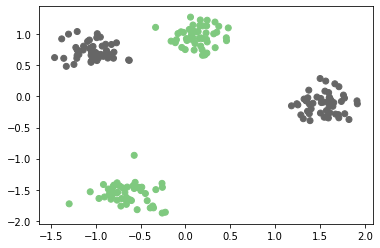

In [62]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
X, y = make_blobs(n_samples=200, centers=4, random_state=42)
X = scale(X)
y = y % 2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')

In [63]:
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegressionCV().fit(X_train, y_train)
logreg.score(X_test, y_test)

/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5

(-2, 1.8)

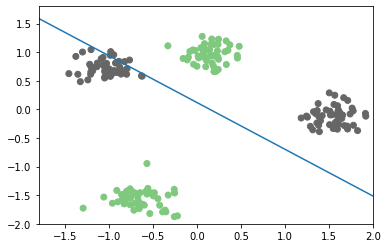

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()

plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])

plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

In [65]:
# Same as PolynomialFeatures(order=2, interactions_only=True)
X_interaction = np.hstack([X, X[:, 0:1] * X[:, 1:]])

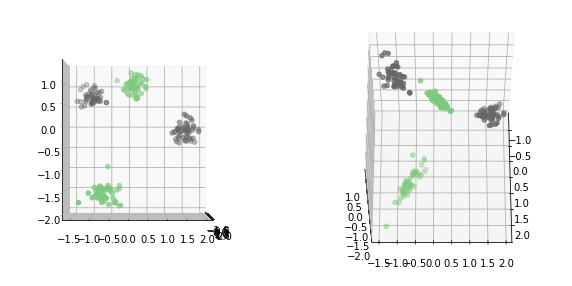

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=0., azim=0)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=60., azim=0)

In [67]:
X_i_train, X_i_test, y_train, y_test = train_test_split(X_interaction, y, random_state=0)
logreg3 = LogisticRegressionCV().fit(X_i_train, y_train)
logreg3.score(X_i_test, y_test)

/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.96

(-2, 1.8)

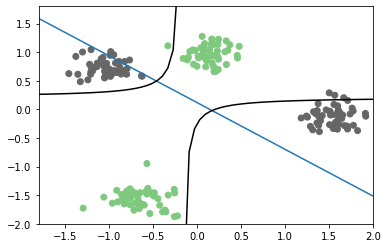

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()
coef3 = logreg3.coef_.ravel()
plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])
curve = -(coef3[0] * line + logreg3.intercept_) / (coef3[1] + line * coef3[2])
mask = coef3[1] + line * coef3[2] > 0
plt.plot(line[mask], curve[mask], c='k')
plt.plot(line[~mask], curve[~mask], c='k')
plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

# Discrete interactions

In [69]:
df = pd.DataFrame({'gender': ['M', 'F', 'M', 'F', 'F'],
                   'age': [14, 16, 12, 25, 22],
                   'spend$': [70, 12, 42, 64, 93],
                   'articles_bought': [5, 10, 2, 1, 1],
                   'time_online': [269, 1522, 235, 63, 21]
                  })
df

,gender,age,spend$,articles_bought,time_online
0,M,14,70,5,269
1,F,16,12,10,1522
2,M,12,42,2,235
3,F,25,64,1,63
4,F,22,93,1,21


In [70]:
dummies = pd.get_dummies(df)
dummies

,age,spend$,articles_bought,time_online,gender_F,gender_M
0,14,70,5,269,0,1
1,16,12,10,1522,1,0
2,12,42,2,235,0,1
3,25,64,1,63,1,0
4,22,93,1,21,1,0


In [71]:
[x + "_F" for x in dummies.columns]

['age_F',
 'spend$_F',
 'articles_bought_F',
 'time_online_F',
 'gender_F_F',
 'gender_M_F']

In [72]:
df_f = dummies.multiply(dummies.gender_F, axis='rows')
df_f = df_f.rename(columns=lambda x: x + "_F")

df_m = dummies.multiply(dummies.gender_M, axis='rows')
df_m = df_m.rename(columns=lambda x: x + "_M")

In [73]:
res = pd.concat([df_m, df_f], axis=1).drop(["gender_F_M", "gender_M_F"], axis=1)
res

,age_M,spend$_M,articles_bought_M,time_online_M,gender_M_M,age_F,spend$_F,articles_bought_F,time_online_F,gender_F_F
0,14,70,5,269,1,0,0,0,0,0
1,0,0,0,0,0,16,12,10,1522,1
2,12,42,2,235,1,0,0,0,0,0
3,0,0,0,0,0,25,64,1,63,1
4,0,0,0,0,0,22,93,1,21,1


# Polynomial Features

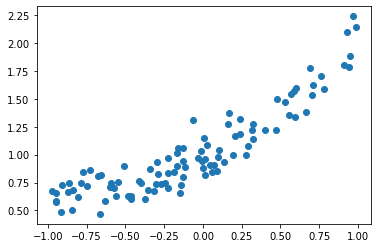

In [74]:
rng = np.random.RandomState(2)
x = rng.uniform(-1, 1, size=(100,))
X = x.reshape(-1, 1)
x_noisy = x + rng.normal(scale=0.1, size=x.shape)
coef = rng.normal(size=3)
y = coef[0] * x_noisy ** 2 + coef[1] * x_noisy + coef[2] + rng.normal(scale=0.1, size=x.shape)
plt.plot(x, y, 'o')

0.7633239152617028

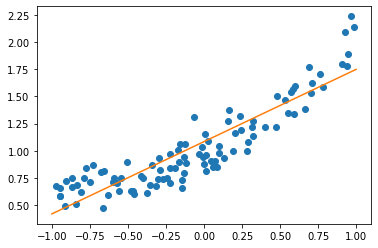

In [75]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
line = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
lr.score(X_test, y_test)

0.8336786269754218

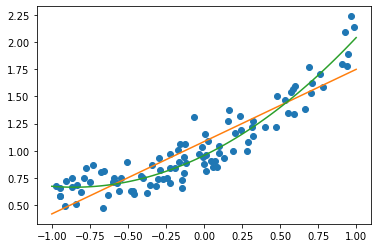

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_lr = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

poly_lr.fit(X_train, y_train)

plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
plt.plot(line, poly_lr.predict(line))
poly_lr.score(X_test, y_test)

In [77]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_bc_poly = poly.fit_transform(X_bc_scaled)
print(X_bc_scaled.shape)
print(X_bc_poly.shape)

(379, 13)
(379, 105)


In [79]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7331923221802794, 0.09937662806858472)

In [80]:
scores = cross_val_score(RidgeCV(), X_bc_poly, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.8611295406776869, 0.08920856428205584)

In [81]:
from sklearn.linear_model import LassoCV, Lasso
scores = cross_val_score(LassoCV(cv=10), X_bc_poly, y_train, cv=10)
np.mean(scores), np.std(scores)

/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.03446053821699, tolerance: 2.903528973607038
  positive)
/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.646845315630344, tolerance: 3.000458674486804
  positive)
/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.558606690329498, tolerance: 2.7987205219941345
  positive)
/Volumes/DecksDark/Apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not 

(0.8384186751221039, 0.12529809396772326)

In [82]:
lasso = LassoCV(max_iter=10000, cv=10).fit(X_bc_poly, y_train)

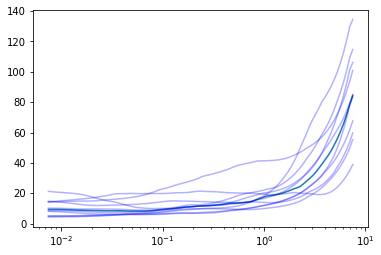

In [83]:
mean = np.mean(lasso.mse_path_, axis=1)
plt.plot(lasso.alphas_, np.median(lasso.mse_path_, axis=1))
plt.plot(lasso.alphas_, lasso.mse_path_, alpha=.3, c='b')
plt.xscale("log")

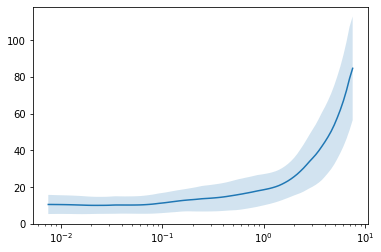

In [84]:
mean = np.mean(lasso.mse_path_, axis=1)
std = np.std(lasso.mse_path_, axis=1)
plt.plot(lasso.alphas_, mean)
plt.fill_between(lasso.alphas_,
                 mean + std,
                 mean - std, alpha=0.2)
plt.xscale("log")

In [85]:
lasso = Lasso(alpha=.1).fit(X_bc_poly, y_train)

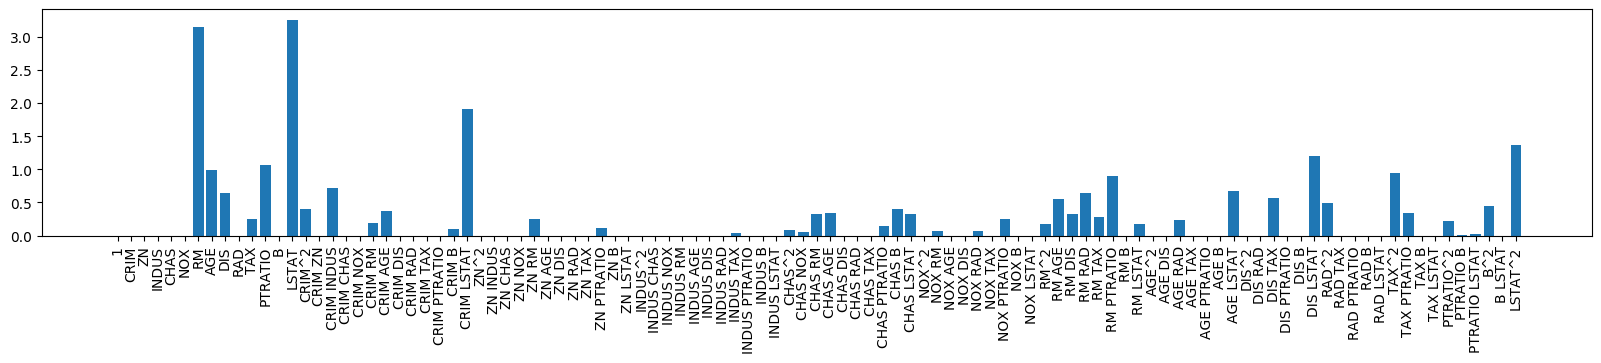

In [86]:
plt.figure(dpi=100, figsize=(20, 3))
plt.bar(range(lasso.coef_.shape[0]), np.abs(lasso.coef_))
plt.xticks(range(lasso.coef_.shape[0]), poly.get_feature_names(boston.feature_names), rotation=90, ha="center");

In [87]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(lasso, prefit=True)

In [88]:
X_selected = np.hstack([X_bc_scaled, select.transform(X_bc_poly)])

In [89]:
X_selected.shape

(379, 57)

In [90]:
scores = cross_val_score(RidgeCV(), X_selected, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.8771757009876893, 0.08386860643414638)

In [91]:
scores

array([0.93699042, 0.90083647, 0.66604481, 0.80188962, 0.8716947 ,
       0.91945834, 0.85470573, 0.95884803, 0.95561052, 0.90567836])

In [92]:
poly_feature_names = select.transform(np.array(poly.get_feature_names(boston.feature_names)).reshape(1, -1)).ravel()

In [93]:
new_feature_names = np.hstack([boston.feature_names, poly_feature_names])

In [94]:
new_feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'LSTAT', 'CRIM^2', 'CRIM INDUS', 'CRIM RM', 'CRIM AGE',
       'CRIM B', 'CRIM LSTAT', 'ZN RM', 'ZN PTRATIO', 'INDUS TAX',
       'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE', 'CHAS PTRATIO',
       'CHAS B', 'CHAS LSTAT', 'NOX RM', 'NOX RAD', 'NOX PTRATIO', 'RM^2',
       'RM AGE', 'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM LSTAT',
       'AGE RAD', 'AGE LSTAT', 'DIS TAX', 'DIS LSTAT', 'RAD^2', 'TAX^2',
       'TAX PTRATIO', 'PTRATIO^2', 'PTRATIO B', 'PTRATIO LSTAT', 'B^2',
       'LSTAT^2'], dtype='<U13')

In [95]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(interaction_only=True), RidgeCV())

# target featurizer

In [96]:
import pandas as pd
data = pd.read_csv("https://github.com/amueller/ml-training-advanced/raw/master/notebooks/data/adult.csv", index_col=0)

In [ ]:
data.columns

In [ ]:
data['native-country'].value_counts()

In [ ]:
income_by_country = data.groupby('native-country').income
counts = income_by_country.value_counts().unstack().fillna(0)
counts

In [ ]:
frequencies = counts.divide(counts.sum(axis=1), axis='rows')
print(frequencies.to_string())

In [ ]:
data['frequency'] = data['native-country'].map(frequencies[' >50K'])

In [ ]:
print(data[['frequency','native-country','income']].head(n=20).to_string())

In [ ]:
from category_encoders import LeaveOneOutEncoder, TargetEncoder